# Preare Packages

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!rm -rf efficientdet
!git clone https://github.com/manhlab/efficientdet

Cloning into 'efficientdet'...
remote: Enumerating objects: 95, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 95 (delta 35), reused 67 (delta 18), pack-reused 0
Unpacking objects: 100% (95/95), done.


In [ ]:
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip

     \ 389kB 9.9MB/s
  Created wheel for tqdm: filename=tqdm-4.28.1-py2.py3-none-any.whl size=47867 sha256=851b17d38700ddd973594140a5354ba9800e0127afb82c7c7c9280c521698f72
  Stored in directory: /tmp/pip-ephem-wheel-cache-8xnf0clq/wheels/41/18/ee/d5dd158441b27965855b1bbae03fa2d8a91fe645c01b419896
Successfully built tqdm
ERROR: spacy 2.2.4 has requirement tqdm<5.0.0,>=4.38.0, but you'll have tqdm 4.28.1 which is incompatible.
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [ ]:
!pip install timm
!pip install pycocotools
!pip install -U git+https://github.com/albumentations-team/albumentations
!pip install git+https://github.com/ildoonet/pytorch-gradual-warmup-lr.git
!git clone https://github.com/omry/omegaconf.git
!git clone https://github.com/NVIDIA/apex
!pip install --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" apex/
!wget https://github.com/rwightman/efficientdet-pytorch/releases/download/v0.1/tf_efficientdet_d7_53-6d1d7a95.pth
!wget https://github.com/rwightman/efficientdet-pytorch/releases/download/v0.1/tf_efficientdet_d6-51cb0132.pth
!wget https://github.com/rwightman/efficientdet-pytorch/releases/download/v0.1/tf_efficientdet_d5-ef44aea8.pth

     |████████████████████████████████| 215kB 5.5MB/s 
  Cloning https://github.com/albumentations-team/albumentations to /tmp/pip-req-build-a2qu18gb
  Running command git clone -q https://github.com/albumentations-team/albumentations /tmp/pip-req-build-a2qu18gb
     |████████████████████████████████| 952kB 5.4MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-cp36-none-any.whl size=65436 sha256=2aefbc9e9a2eb18301b557d5c35fd9184c2e21873e62211db0ef83ef95273968
  Stored in directory: /tmp/pip-ephem-wheel-cache-kscq95nn/wheels/6f/77/82/86baf8aeda64a6de0f890cd0f2fb31acaf5545cc9c99ad21ba
Successfully built albumentations
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12
  Cloning https://github.com/ildoonet/pytorch-gradual-warmup-lr.git to /tmp/pip-req-build-

In [ ]:
#@title
from shutil import copyfile
! pip install --upgrade --force-reinstall --no-deps kaggle
! mkdir ~/.kaggle
! cp "/content/gdrive/My Drive/EFD/kaggle.json" ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c global-wheat-detection
! unzip global-wheat-detection.zip -d data/

     |████████████████████████████████| 61kB 2.8MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-cp36-none-any.whl size=72859 sha256=78d055d2235c7290b1bc2746d0cea86f82f230e4d4859ca44484dfb2cd531c76
  Stored in directory: /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
Successfully built kaggle
  Found existing installation: kaggle 1.5.6
    Uninstalling kaggle-1.5.6:
      Successfully uninstalled kaggle-1.5.6
 99% 601M/607M [00:05<00:00, 92.3MB/s]
100% 607M/607M [00:05<00:00, 120MB/s] 
Archive:  global-wheat-detection.zip
  inflating: data/sample_submission.csv  
  inflating: data/test/2fd875eaa.jpg  
  inflating: data/test/348a992bb.jpg  
  inflating: data/test/51b3e36ab.jpg  
  inflating: data/test/51f1be19e.jpg  
  inflating: data/test/53f253011.jpg  
  inflating: data/test/796707dd7.jpg  
  inflating: data/test/aac893a91.jpg  
  inflating: data/test/cb8d261a3.jpg  
  inflating: data/test/cc3532ff6.jpg  
  inflating: data/test/f5a1f0358.jp

In [ ]:
! cp "/content/gdrive/My Drive/EFD/data_split.csv" data
! cp "/content/gdrive/My Drive/EFD/train.csv" data

# Import packages and prepare data

In [22]:
import sys
sys.path.insert(0, "/content/efficientdet")
sys.path.insert(0, "/content/omegaconf")

import torch
import os
from datetime import datetime
import math
import time
import random
import cv2
import pandas as pd
import numpy as np
import albumentations as A
import matplotlib.pyplot as plt
import torchsummary
from effdet.myutils import *
from tqdm.auto import tqdm
from albumentations.pytorch.transforms import ToTensorV2
from sklearn.model_selection import StratifiedKFold
from torch.utils.data import Dataset,DataLoader
from torch.utils.data.sampler import SequentialSampler, RandomSampler
from glob import glob
from effdet import get_efficientdet_config, EfficientDet, DetBenchTrain
from effdet.efficientdet import HeadNet
from warmup_scheduler import GradualWarmupScheduler
from prefetch_generator import BackgroundGenerator

import warnings
warnings.filterwarnings("ignore")

In [23]:
SEED = 42
seed_everything(SEED)

In [24]:
marking = pd.read_csv('/content/data/train.csv')
bboxs = np.stack(marking['bbox'].apply(lambda x: np.fromstring(x[1:-1], sep=',')))
for i, column in enumerate(['x', 'y', 'w', 'h']):
    marking[column] = bboxs[:,i]
marking.drop(columns=['bbox'], inplace=True)

df_folds = pd.read_csv('/content/data/data_split.csv')

In [ ]:
TRAIN_ROOT_PATH = '/content/data/train'

fold_number = 0

train_dataset = DatasetRetriever(
  image_ids=df_folds[df_folds['fold'] != fold_number].image_id.values,
  marking=marking,
  data_path=TRAIN_ROOT_PATH,
  transforms=get_train_transforms(),
  test=False,
  cache=True
)


validation_dataset = DatasetRetriever(
  image_ids=df_folds[df_folds['fold'] == fold_number].image_id.values,
  marking=marking,
  data_path=TRAIN_ROOT_PATH,
  transforms=get_valid_transforms(),
  test=True,
  cache=True
)


## check if it works

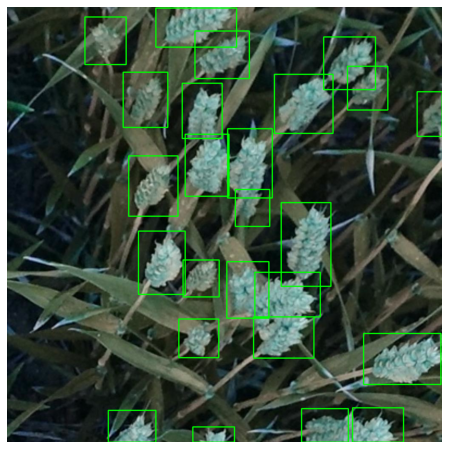

In [25]:
image, target, image_id = validation_dataset[1]
boxes = target['boxes'].cpu().numpy().astype(np.int32)

numpy_image = image.permute(1,2,0).cpu().numpy()

fig, ax = plt.subplots(1, 1, figsize=(16, 8))

for box in boxes:
  cv2.rectangle(numpy_image, (box[1], box[0]), (box[3],  box[2]), (0, 1, 0), 2)
    
ax.set_axis_off()
ax.imshow(numpy_image);

# Config and some functions

In [26]:
class TrainGlobalConfig:
  folder = 'gdrive/My Drive/EFD/fold0/run'
  num_workers = 4
  batch_size = 2
  num_classes = 1
  n_epochs = 40 # n_epochs = 40
  lr = 0.005
  accumulate = 16
  apex = True
  img_size = 512
  debug = False

  verbose = True
  verbose_step = 1

  SchedulerClass = torch.optim.lr_scheduler.CosineAnnealingLR
  scheduler_params = {
    'T_max':6,
    'eta_min':5e-6
  }

  step_scheduler = True  # do scheduler.step after optimizer.step
  validation_scheduler = False  # do scheduler.step after validation stage loss
  warmup = False # do scheduler.step every batch!

  


In [27]:
class DataLoaderX(DataLoader):
    def __iter__(self):
        return BackgroundGenerator(super().__iter__())

In [28]:
def collate_fn(batch):
    return tuple(zip(*batch))

def run_training(net):
  device = torch.device('cuda:0')
  net.to(device)

  train_loader = DataLoaderX(
      train_dataset,
      batch_size=TrainGlobalConfig.batch_size,
      sampler=RandomSampler(train_dataset),
      pin_memory=False,
      drop_last=True,
      num_workers=TrainGlobalConfig.num_workers,
      collate_fn=collate_fn,
  )
  val_loader = DataLoaderX(
      validation_dataset, 
      batch_size=TrainGlobalConfig.batch_size,
      num_workers=TrainGlobalConfig.num_workers,
      shuffle=False,
      sampler=SequentialSampler(validation_dataset),
      pin_memory=False,
      collate_fn=collate_fn,
  )

  fitter = Fitter(model=net, device=device, config=TrainGlobalConfig)
  fitter.fit(train_loader, val_loader)

def get_net():
  config = get_efficientdet_config('tf_efficientdet_d6')
  net = EfficientDet(config, pretrained_backbone=False)

  config.num_classes = 1
  config.image_size = 512
  net.class_net = HeadNet(config, num_outputs=config.num_classes, norm_kwargs=dict(eps=.001, momentum=.01))
  checkpoint = torch.load('/content/gdrive/My Drive/EFD/fold0/run/last-checkpoint.bin')
  net.load_state_dict(checkpoint['model_state_dict'])
  return DetBenchTrain(net, config)

# get and train the model

In [29]:
net = get_net()

In [ ]:
run_training(net)

Fitter prepared. Device is cuda:0
Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic

2020-07-26T18:39:09.725322
LR: 0.0


Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32768.0
Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


In [ ]:
!mkdir '/content/gdrive/My Drive/EFD/fold0'

In [ ]:
!cp -r run '/content/gdrive/My Drive/EFD/'

In [ ]:
!nvidia-smi

Tue Jul 21 17:42:55 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    37W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!ps -elf | grep python

4 S root          18       8  0  80   0 - 123844 epoll_ 16:58 ?       00:00:05 /usr/bin/python2 /usr/local/bin/jupyter-notebook --ip="172.28.0.2" --port=9000 --FileContentsManager.root_dir="/" --MappingKernelManager.root_dir="/content"
4 S root        1158      18  6  80   0 - 8272233 select 17:36 ?      00:00:15 /usr/bin/python3 -m ipykernel_launcher -f /root/.local/share/jupyter/runtime/kernel-f5caaa09-8322-44a0-a7c3-86a07445fe37.json
1 S root        1208    1158  0  80   0 - 4735941 sys_po 17:37 ?      00:00:01 /usr/bin/python3 -m ipykernel_launcher -f /root/.local/share/jupyter/runtime/kernel-f5caaa09-8322-44a0-a7c3-86a07445fe37.json
1 S root        1209    1158  0  80   0 - 4735944 sys_po 17:37 ?      00:00:00 /usr/bin/python3 -m ipykernel_launcher -f /root/.local/share/jupyter/runtime/kernel-f5caaa09-8322-44a0-a7c3-86a07445fe37.json
0 S root        1265    1158  0  80   0 -  9799 wait   17:40 ?        00:00:00 /bin/bash -c ps -elf | grep python
0 S root        1267    1265  0  80

In [ ]:
!kill -9 1158 1208 1209